In [1]:
from seppy.tools import Event
import seppy.tools.widgets as w
import datetime, os

# Choose spacecraft, sensor, viewing direction and particle species from the drop-down menu:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'SOHO', 'PSP'), value='S…

Dropdown(description='Sensor:', options=('SEPT', 'HET'), value='SEPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Set the data path and date range to load data:

In [7]:
# The path to where data is located / to be downloaded (by default the current directory)
data_path = f"{os.getcwd()}/data/"

# Format of date: year, month, day
startdate = datetime.date(2021, 10, 9)
enddate = datetime.date(2021, 10, 10)

# Set the averaging period, or leave to None to not resample data
# averaging should be a pandas-compatible string, e.g. '1h', '2min', '15s'
averaging = "1min"

In [8]:
# Get event data:
Event_class = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value,
                    start_date=startdate, end_date=enddate, 
                    data_path=data_path)

# User may select which channels to plot for the TSA. Adjust the slider to find the path length that collapses the sudden increase in varying channels on top of each other. Use Normalize to normalize all channels to their maximum intensity.

In [9]:
# Select the channels to be plotted (first, last, step), end-exclusively (use None to choose all)
channels = (0, 15, 3)

# Cut the data if need be (leave to None to use full data)
xlim = None #("2021-10-09 18:00", "2021-10-10 23:59")

INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


FloatSlider(value=0.0, description='Path length L [AU]: ', max=2.55, step=0.05, style=SliderStyle(description_…

RadioButtons(description='Intensity:', options=('original data', 'normalized'), value='original data')

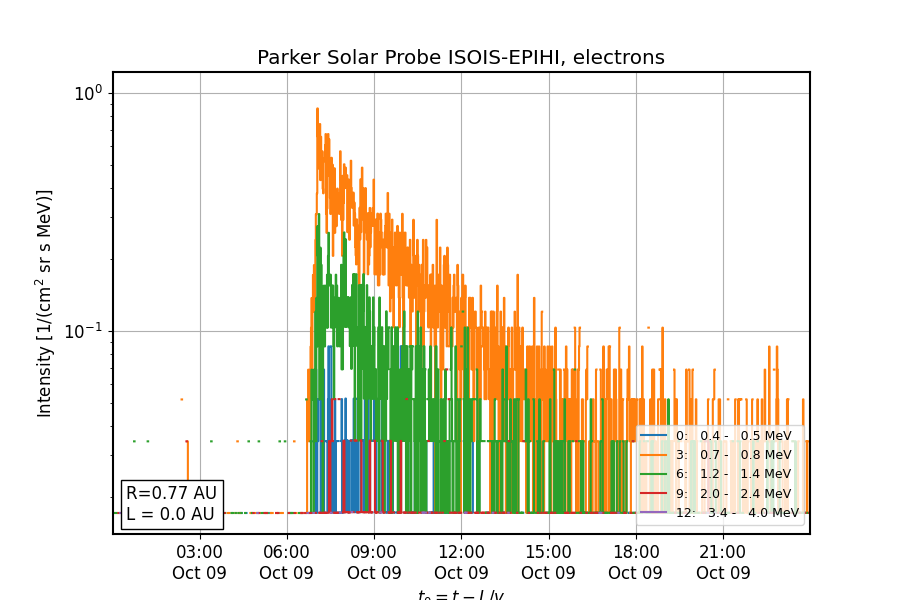

In [10]:
%matplotlib widget
Event_class.tsa_plot(w.view_drop.value, selection=channels, xlim=xlim, resample=averaging)

# Saving the figure is done in the plot window, by hovering mouse to the left side of the plot and clicking "Download plot"

---
# FAQ / Problems <a class="anchor" id="faq"></a>

- **I get some error about missing data, or that the data is broken, or something I don't understand.**

Most times such a problem originates in an incomplete download of the corresponding data file. The easiest approach to solve that problem is to delete the file and run the code again to re-download it. 
To do this, first check if a `path` has been provided. If `path` has *not* been defined (or as `None`), the standard `path` for SunPy downloads should have been used. You can obtain it by running the following code cell:


In [2]:
import sunpy 
sunpy.config.get('downloads', 'download_dir')

'/home/gieseler/sunpy/data'

Open the corresponding directory in your file browser and look for the corresponding data file. Usually it's easiest to order the files by modification date, so that the latest modified file (which usually should be the culprit) comes first. Then delete the corresponding file(s), and run the code again.